<a href="https://colab.research.google.com/github/legendarygirl56/CODE/blob/master/hand_written_num_detection_0_to_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow

In [11]:
import tensorflow as tf

tf.__version__

mnist=tf.keras.datasets.mnist #28*28 image datasets of handwriten images from digits 0-9
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train, epochs=3)


Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2606 - accuracy: 0.9230
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1042 - accuracy: 0.9682
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0730 - accuracy: 0.9765


In [12]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0878 - accuracy: 0.9741
0.0878274142742157 0.9740999937057495


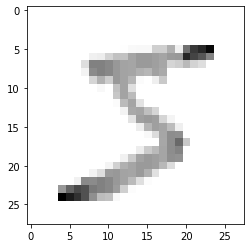

In [10]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0] , cmap= plt.cm.binary)
plt.show()
#print(x_train[0])

In [13]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [0]:
new_model= tf.keras.models.load_model('epic_num_reader.model')

In [0]:
predictions = new_model.predict(x_test)

In [22]:
print(predictions)

[[6.0768017e-09 1.8192699e-07 4.5864861e-05 ... 9.9989474e-01
  2.5206350e-07 5.0301929e-07]
 [5.3700915e-06 4.6016354e-04 9.9952316e-01 ... 9.7831512e-09
  6.2620114e-07 2.7693337e-10]
 [1.4242704e-07 9.9981767e-01 4.7577187e-06 ... 7.3617099e-05
  9.6728923e-05 9.3057402e-08]
 ...
 [4.1049650e-10 7.4929666e-08 1.0579835e-09 ... 2.8269207e-07
  3.6255449e-07 2.6533960e-05]
 [6.6483800e-08 1.2685002e-06 2.1128818e-08 ... 8.0804021e-08
  1.5107318e-04 6.4273860e-07]
 [7.8216533e-07 2.7783598e-09 1.5814337e-07 ... 1.4101474e-11
  1.2730101e-07 1.7364013e-07]]


In [23]:
import numpy as np

print(np.argmax(predictions[0]))

7


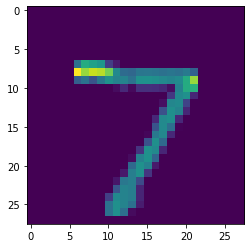

In [24]:
plt.imshow(x_test[0])